# PCA - Reducción de Dimensionalidad

En esta actividad, aplicaremos **PCA (Análisis de Componentes Principales)** para reducir la dimensionalidad del dataset 'Wine Quality'.

In [1]:

# Importar librerías necesariass
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración del Dataset

In [2]:

# Cargar el dataset
file_path = 'data/winequality-red.csv'
wine_data = pd.read_csv(file_path)

# Mostrar las primeras filas
print(wine_data.head())

# Resumen estadístico del dataset
print(wine_data.describe())

# Verificar valores nulos
print(wine_data.isnull().sum())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## 2. Preprocesamiento de Datos

Realizaremos una **normalización** de las características para asegurar que todas las variables contribuyan de forma equitativa al PCA.

In [3]:

# Separar las características y la variable objetivo
features = wine_data.drop(columns=['quality'])

# Normalizar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convertir a DataFrame para una mejor visualización
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


## 3. Aplicación de PCA

Aplicaremos PCA para determinar cuántos componentes son necesarios para capturar el **90%** de la varianza del dataset.

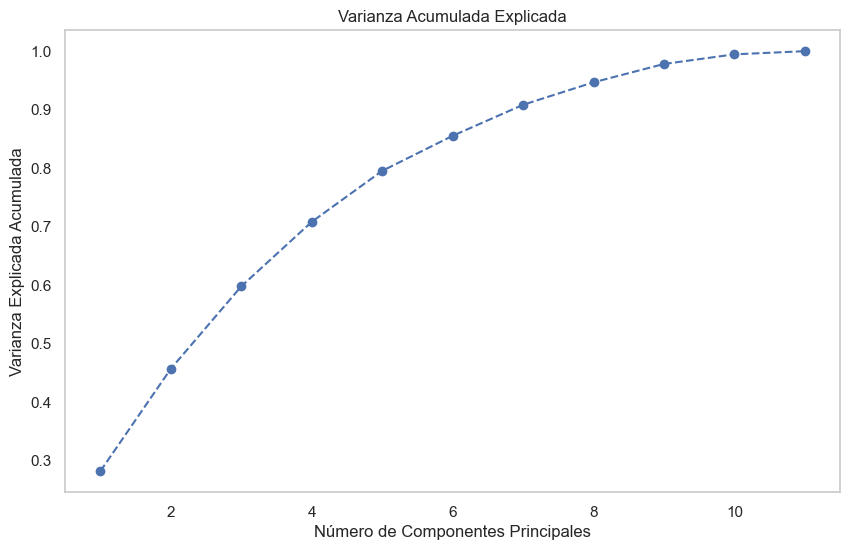

Número de componentes necesarios para capturar el 90% de la varianza: 7


In [4]:

# Aplicar PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

# Determinar el número de componentes para 90% de varianza
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Número de componentes necesarios para capturar el 90% de la varianza: {num_components}")


## 4. Interpretación de Componentes Principales

Analizamos los coeficientes de cada componente principal para identificar las variables más influyentes.

In [5]:

# Coeficientes de los componentes principales
components_df = pd.DataFrame(pca.components_, columns=features.columns)

# Mostrar los coeficientes de los primeros componentes
print(components_df.iloc[:num_components])


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.489314         -0.238584     0.463632        0.146107   0.212247   
1      -0.110503          0.274930    -0.151791        0.272080   0.148052   
2      -0.123302         -0.449963     0.238247        0.101283  -0.092614   
3      -0.229617          0.078960    -0.079418       -0.372793   0.666195   
4      -0.082614          0.218735    -0.058573        0.732144   0.246501   
5      -0.101479         -0.411449    -0.069593       -0.049156  -0.304339   
6       0.350227          0.533735    -0.105497       -0.290663  -0.370413   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.036158              0.023575  0.395353 -0.438520   0.242921   
1             0.513567              0.569487  0.233575  0.006711  -0.037554   
2             0.428793              0.322415 -0.338871  0.057697   0.279786   
3            -0.043538             -0.034577 -0.174500 -0.0

## 5. Visualización en el Espacio de Componentes Principales

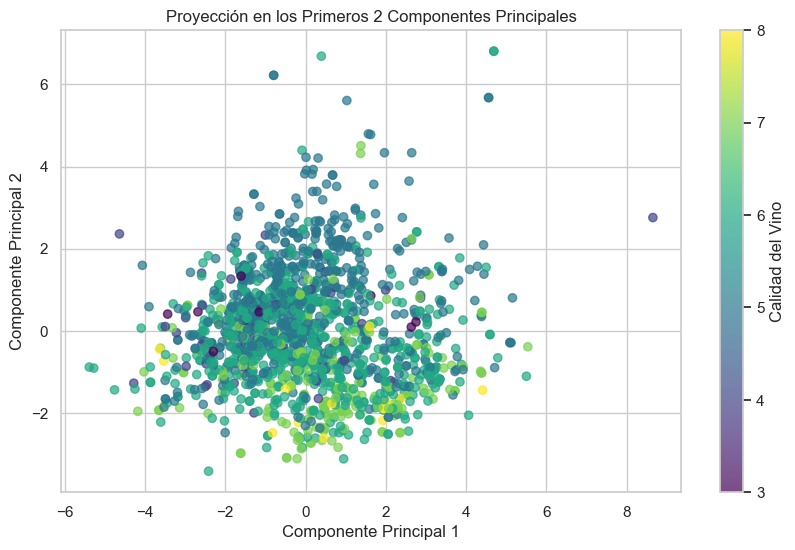

In [6]:

# Proyectar los datos en los dos primeros componentes principales
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(scaled_features)

# Visualizar los datos en 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_2d[:, 0], reduced_2d[:, 1], c=wine_data['quality'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Calidad del Vino')
plt.title('Proyección en los Primeros 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


## 6. Análisis de Resultados

- **Número de componentes principales necesarios:** Determinado para capturar al menos el 90% de la varianza.
- **Variables influyentes:** Se identifican según los coeficientes de los componentes principales.
- **Visualización 2D:** Facilita la comprensión de la distribución de los datos.

## Conclusión

El PCA nos permite reducir la dimensionalidad del dataset, facilitando su análisis y mejorando el rendimiento de modelos de Machine Learning al eliminar redundancias en las características.